In [1]:
from SupportVectorMachine import SVM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from OneVsRestClassifier import OneVsRestClassifier
from sklearn.datasets import make_blobs, make_moons

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('deep'))

In [3]:
# X, y = make_blobs(
#     n_samples=600,
#     n_features=2,
#     centers=3,
#     cluster_std=0.5,
#     random_state=0
# )
X, y = make_moons(
    n_samples=60,
    noise=0.05,
    random_state=0
)

<AxesSubplot: >

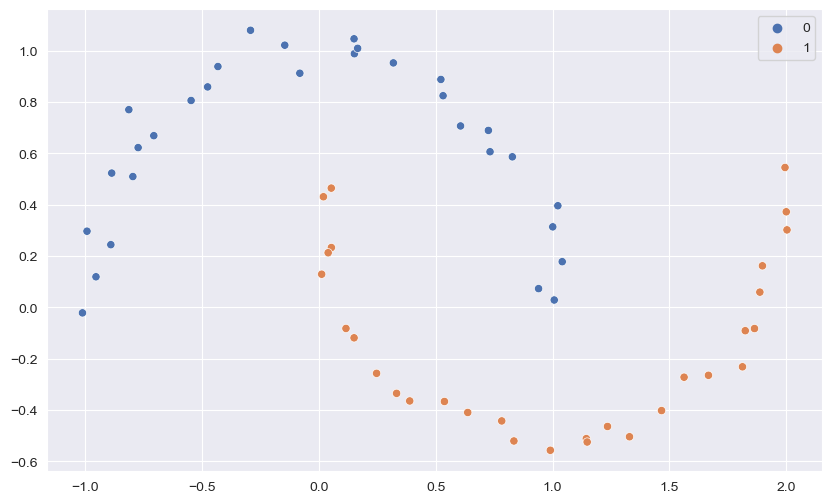

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(y))

In [5]:
%%time
ovr_clf = OneVsRestClassifier(SVM, 2, C=10, kernel='rbf', gamma=0.001)
ovr_clf.fit(X, y)

CPU times: total: 344 ms
Wall time: 360 ms


<AxesSubplot: >

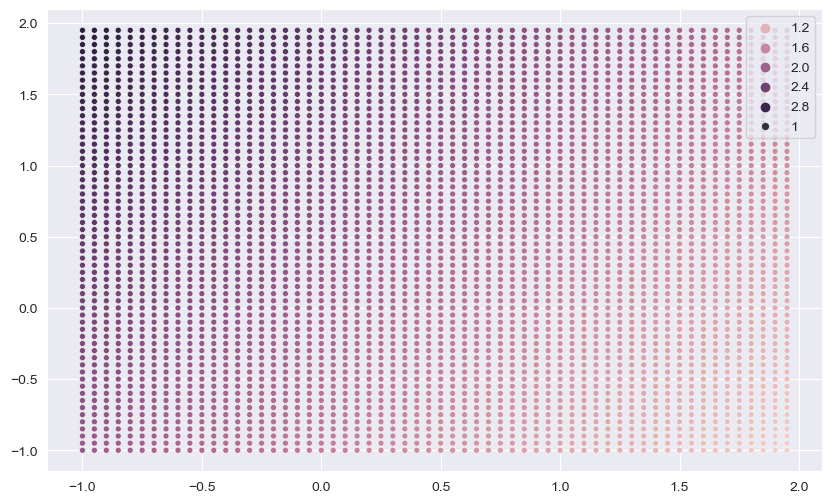

In [6]:
xx, yy = np.mgrid[-1:2:.05, -1:2:.05]
xx, yy = xx.reshape(xx.shape[0] ** 2), yy.reshape(yy.shape[0] ** 2)
scores = np.array([
    ovr_clf.evaluate(np.array([x, y])) for x, y in zip(xx, yy)
]).reshape(xx.shape)

sns.scatterplot(x=xx, y=yy, hue=scores, size=1)

In [7]:
ovr_clf.predict([2, .4])

1

In [8]:
ovr_clf._classifiers[0].n_iter

47